# Predicting Crime in US Communites
## Team member: Bibata Rabba Idi, Fatima Javid, JianHui (Jake) Li 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('crimedata.csv')
df.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [3]:
# Shape of dataframe
df.shape

(2215, 146)

In [4]:
# Number of nulls from each column
print(df.isnull().sum())

# Total number of nulls
print("\nTotal number of nulls:", df.isnull().sum().sum())

communityName             0
state                     0
countyCode             1221
communityCode          1224
population                0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 146, dtype: int64

Total number of nulls: 44592


In [5]:
# Make a list of columns that contain nulls
cols_with_nulls = df.columns[df.isna().any()].tolist()
print(cols_with_nulls, "\n")

# Show number of nulls for each column that contain nulls
print(df[cols_with_nulls].isnull().sum())

['countyCode', 'communityCode', 'OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop'] 

countyCode              1221
communityCode           1224
OtherPerCap                1
LemasSwornFT            1872
LemasSwFTPerPop         1872
LemasSwFTFieldOps       1872
LemasSwFTFieldPerPop    1872
LemasTotalReq           1872
LemasTotReqPerPop       1872
PolicReqPerOffic        1872
PolicPer

In [6]:
# Remove crime columns below PolicBudgPerPop and OtherPerCap from the list
del cols_with_nulls[25:]
del cols_with_nulls[2]

# Drop columns using cols_with_nulls
print("Columns before dropping:", df.shape[1])
df.drop(cols_with_nulls, axis=1, inplace=True)
print("Columns after dropping:", df.shape[1])

Columns before dropping: 146
Columns after dropping: 122


In [7]:
# Fill in Na values with -999
cols_with_nulls_2 = df.columns[df.isna().any()].tolist()
df[cols_with_nulls_2] = df[cols_with_nulls_2].fillna(-999)

In [8]:
# Check number of nulls
df.isnull().sum().sum()

0

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Create a column for the sum of all crimes
df["total_crime"] = df["murders"] + df["rapes"] + df["robberies"] + df["assaults"] + df["burglaries"] + df["larcenies"] + df["autoTheft"] + df["arsons"]

<AxesSubplot: ylabel='total_crime'>

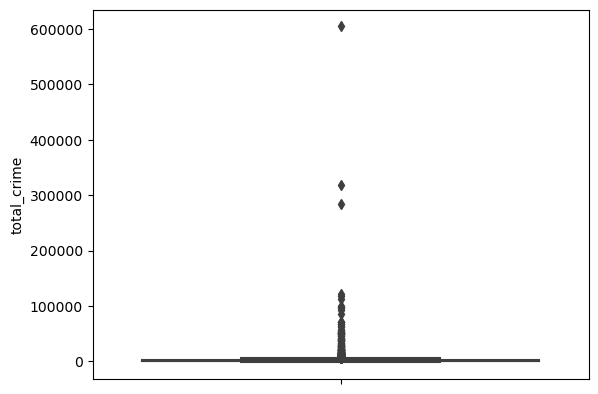

In [11]:
# Boxplot for sum of all crimes
sns.boxplot(data=df, y='total_crime')

In [12]:
# Keep only records where total_crime is greater than 0
df = df[df['total_crime'] > 0]

<AxesSubplot: >

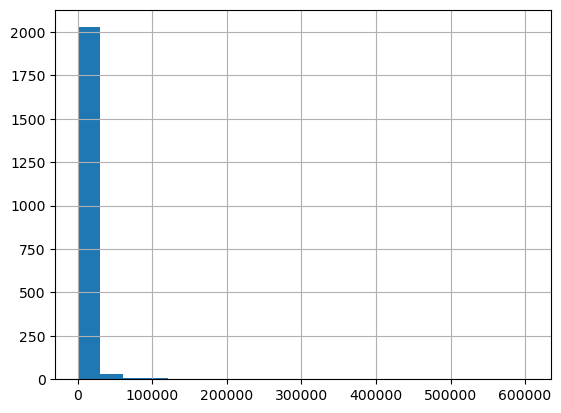

In [13]:
# Check distribution of data using histogram
df.total_crime.hist(bins=20)

In [14]:
# Define all_features using all the columns in the dataframe
all_features = df.columns.tolist()
print(all_features)

['communityName', 'state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'Pct

In [15]:
# Remove crime columns, "communityName", and "state" from features 
del all_features[104:]
del all_features[0:2]
print(all_features)
print("\nNumber of features after removing unnecessary features: ", len(all_features))

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLar

In [16]:
# Initial random forest model using all features
X = df[all_features]
y = df["total_crime"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [17]:
# R^2 and mean absolute error score
y_pred = model.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.9433785630588444
Mean Absolute Error: 1004.1189397590362


In [18]:
# Check feature importance
feature_imp = pd.Series(model.feature_importances_, index=all_features).sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_imp)

NumUnderPov              0.329811
population               0.169377
numbUrban                0.141671
NumInShelters            0.097520
NumKidsBornNeverMar      0.064039
NumImmig                 0.056150
HousVacant               0.037527
NumStreet                0.021872
PctUsePubTrans           0.015339
LemasPctOfficDrugUn      0.005416
PersPerFam               0.004228
PctWOFullPlumb           0.004212
PctSameCity85            0.003336
racePctAsian             0.002697
agePct12t29              0.002157
PctRecImmig5             0.002023
PctSameState85           0.001987
PctVacantBoarded         0.001920
pctWWage                 0.001905
PopDens                  0.001318
PctLargHouseFam          0.001245
racePctHisp              0.001235
MedRentPctHousInc        0.001186
PctSpeakEnglOnly         0.001170
PctLess9thGrade          0.001129
PctImmigRec5             0.001100
pctWInvInc               0.001081
LandArea                 0.001055
racePctWhite             0.001040
PctImmigRecent

In [19]:
# Use the top 5 features to run our model again
list_of_features = feature_imp.index.tolist()
top_5_features = list_of_features[:5]
top_5_features

['NumUnderPov',
 'population',
 'numbUrban',
 'NumInShelters',
 'NumKidsBornNeverMar']

In [20]:
# 2nd model using top 5 features based on feature importance
X = df[top_5_features]
y = df["total_crime"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [21]:
# R^2 and mean absolute error score
y_pred = model.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.9120422154335281
Mean Absolute Error: 1040.9310843373494
